## Librerías necesarias

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

## Variables globales del sistema

In [ ]:
original_dir = pathlib.Path("TFGDatasetOriginal/Image Data Base")
new_base_dir = pathlib.Path("TFGDataset")
contenido = os.listdir(original_dir)
BATCH_SIZE = 256
size_x = 180
size_y = 180

## Función para contar imágenes por categorías

In [ ]:
original_dir = pathlib.Path("TFGDatasetOriginal/Image Data Base")
contenido = os.listdir(original_dir)

def contando_categorias():
    contador_mas200 = 0
    contador_menos200 = 0
    for categoria in contenido:
        contador = 0
        for path in pathlib.Path(original_dir / categoria).iterdir():   
            contador += 1
        if contador < 200:
            contador_menos200 += 1
        else:
            contador_mas200 += 1
    print("Hay "+ str(contador_mas200) + " categorias con más de 200 ejemplos")
    print("Hay "+ str(contador_menos200) + " categorias con menos de 200 ejemplos")
        
contando_categorias()

## Función para crear carpetas de subconjuntos de datos a partir de un dataset

In [1]:

def make_subsets(proportion):
    for category in contenido:
        fnames = []
        count = 1
        for path in (original_dir / category).iterdir():
            fnames.append(os.path.basename(path))
            count += 1
        sobrante = count % 10
        datos = count - sobrante
        datos = min(datos, 200)
        primero = int(datos * proportion[0])
        segundo = int(datos * proportion[1]) + primero
        tercero = int(datos * proportion[2]) + segundo
        train = fnames[0:primero]
        validation = fnames[primero:segundo]
        test = fnames[segundo:tercero]
        train.extend(fnames[tercero:])
        clasification = {"train": train, "validation": validation, "test": test}
        for subset in ["train", "validation", "test"]:
            dir = new_base_dir / subset / category
            os.makedirs(dir)
            count = 1
            for fname in clasification[subset]:
                file = str(count) + '.jpg'
                try:
                    shutil.copyfile(src=original_dir / category / fname, dst=dir / file)
                    count += 1
                except:
                    print("error")
                    
                    
proportion = [0.8, 0.1, 0.1] #Para dividir los datos en conjuntos de estas proporciones
make_subsets(proportion)

NameError: name 'contenido' is not defined

## Creación de los datasets específicos a partir de las carpetas 

In [1]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')

NameError: name 'image_dataset_from_directory' is not defined

## Comprobación de que está todo en orden y muestreo

In [ ]:
 for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

In [ ]:
plt.figure(figsize=(13, 13))
class_names = train_dataset.class_names
for images, labels in train_dataset.take(2):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        arr = labels[i].numpy()
        tuple = np.where(arr == 1)
        plt.title(class_names[tuple[0][0]])
        plt.axis("off")

## Modelo creado desde cero

In [ ]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(58, activation="softmax")(x)
model0 = keras.Model(inputs=inputs, outputs=outputs)

model0.summary()

## Entrenamiento y guardado de resultados del modelo cero

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="model0/convnet0_better",
 save_best_only=True,
 monitor="val_loss")
]

In [ ]:
model0.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [ ]:
history = model0.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

In [ ]:
model0.save('model0/model')

In [ ]:
np.save('model0/history0.npy',history.history)

## Análisis de resultados

In [ ]:
my_model = load_model('model0/model')

In [ ]:
my_history=np.load('model0/history0.npy',allow_pickle='TRUE').item()

In [ ]:
loss = my_history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = my_history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model('model0/model')
results= model.evaluate(test_dataset)
results

In [ ]:
model = keras.models.load_model('model0/convnet0_better')
results= model.evaluate(test_dataset)
results

# Aumento de imagenes

In [ ]:
model0.save('model0/model')

In [ ]:
np.save('model0/history0.npy',history.history)

## Análisis de resultados

In [53]:
my_model = load_model('model0/model')

In [51]:
my_history=np.load('model0/history0.npy',allow_pickle='TRUE').item()

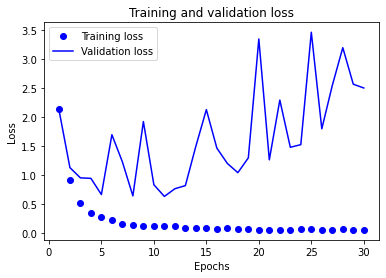

In [52]:
loss = my_history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

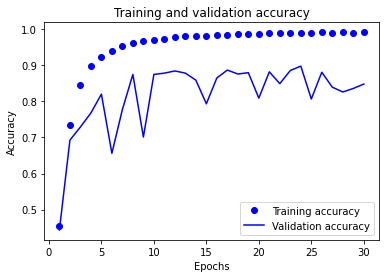

In [54]:
plt.clf()
acc = my_history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
model = keras.models.load_model('model0/model')
results= model.evaluate(test_dataset)
results

4/4 [==============================] - 8s 86ms/step - loss: 2.0268 - accuracy: 0.8563


[2.026808738708496, 0.85627281665802]

In [57]:
model = keras.models.load_model('model0/convnet0_better')
results= model.evaluate(test_dataset)
results

4/4 [==============================] - 2s 86ms/step - loss: 0.6255 - accuracy: 0.8879


[0.625526487827301, 0.8879415392875671]

# Aumento de imagenes